In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table
from sklearn.model_selection import train_test_split
import sklearn
import time
import matplotlib
import lightgbm
import catboost
import seaborn as sns

In [2]:
start = time.time()
    
#Load data:
cat = Table.read('./cosmos2020cat/galaxies_flag.fits', format='fits', hdu=1)
data = cat.to_pandas()
data = data.dropna()

total_time = (time.time() - start)
print(f'Total needed time for loading data: {total_time/60} minutes')

Total needed time for loading data: 0.0460351824760437 minutes


# Redshift

In [3]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [4]:
y_train = y_train['lp_zBEST'] + 1 # Only redshifts for now, but 1+z.
y_val = y_val['lp_zBEST'] + 1
y_test = y_test['lp_zBEST'] + 1

In [5]:
start = time.time()
def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.15, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.689460  0.366135  0.247388 -0.000001
0          50.0        4.0          0.419732  0.175356  0.118484  0.436191
0          50.0        7.0          0.380872  0.152972  0.103359  0.468419
0          50.0        9.0          0.365967  0.146634  0.099077  0.476140
0         100.0        0.0          0.689460  0.366135  0.247388 -0.000001
0         100.0        4.0          0.393938  0.160524  0.108462  0.458484
0         100.0        7.0          0.360192  0.141916  0.095889  0.480173
0         100.0        9.0          0.349448  0.136565  0.092274  0.481132
0         150.0        0.0          0.689460  0.366135  0.247388 -0.000001
0         150.0        4.0          0.383017  0.154981  0.104717  0.471013
0         150.0        7.0          0.352352  0.137028  0.092587  0.486869
0         150.0        9.0          0.345222  0.133587  0.090261  0.483156
Total needed time for cat

Outlier fraction: 
 0.3454477997160924

 Bias: 
 0.08900057470436083

 NMAD score: 
 0.13172085056245403

 R2 Test: 
 0.4772753096297281


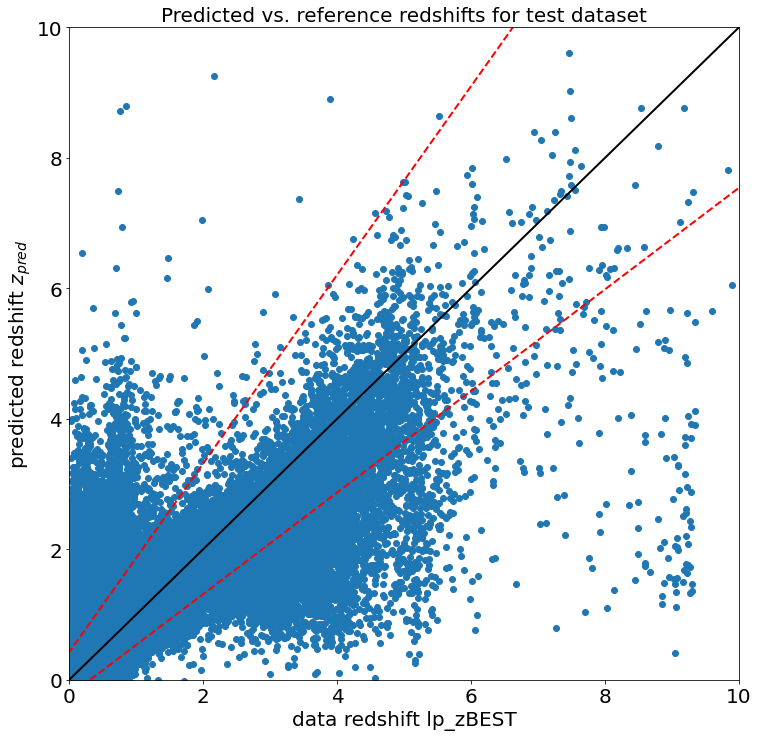

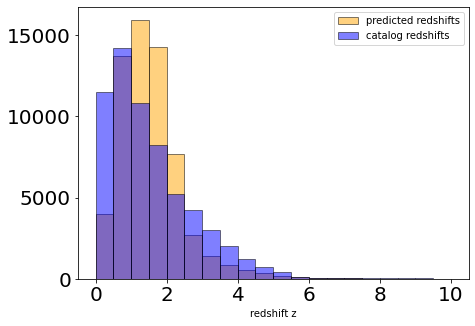

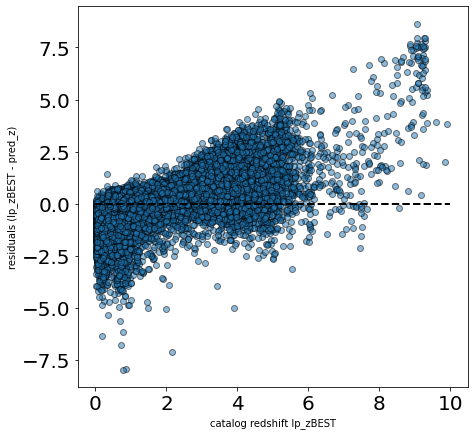

In [6]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test-1, pred_z-1)
plt.title('Predicted vs. reference redshifts for test dataset', fontsize = 20)
plt.xlabel('data redshift lp_zBEST', fontsize = 20)
plt.ylabel('predicted redshift $z_{pred}$', fontsize = 20)
plt.xlim(0,10)
plt.ylim(0,10)
x0, x1 = 0, 10
y0, y1 = 0, 10
plt.plot([np.min(y_test-1)-0.3*(1+np.min(y_test-1)), np.max(y_test-1)-0.30*(np.max(y_test-1)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test-1)+0.3*(1+np.min(y_test-1)), np.max(y_test-1)+0.30*(np.max(y_test-1)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z-1, 20, range = (0,10),facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted redshifts')
plt.hist(y_test-1, 20, range = (0,10), facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog redshifts')
plt.xlabel('redshift z')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test-1, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog redshift lp_zBEST')
plt.ylabel('residuals (lp_zBEST - pred_z)')
x0, x1 = 0, 10
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

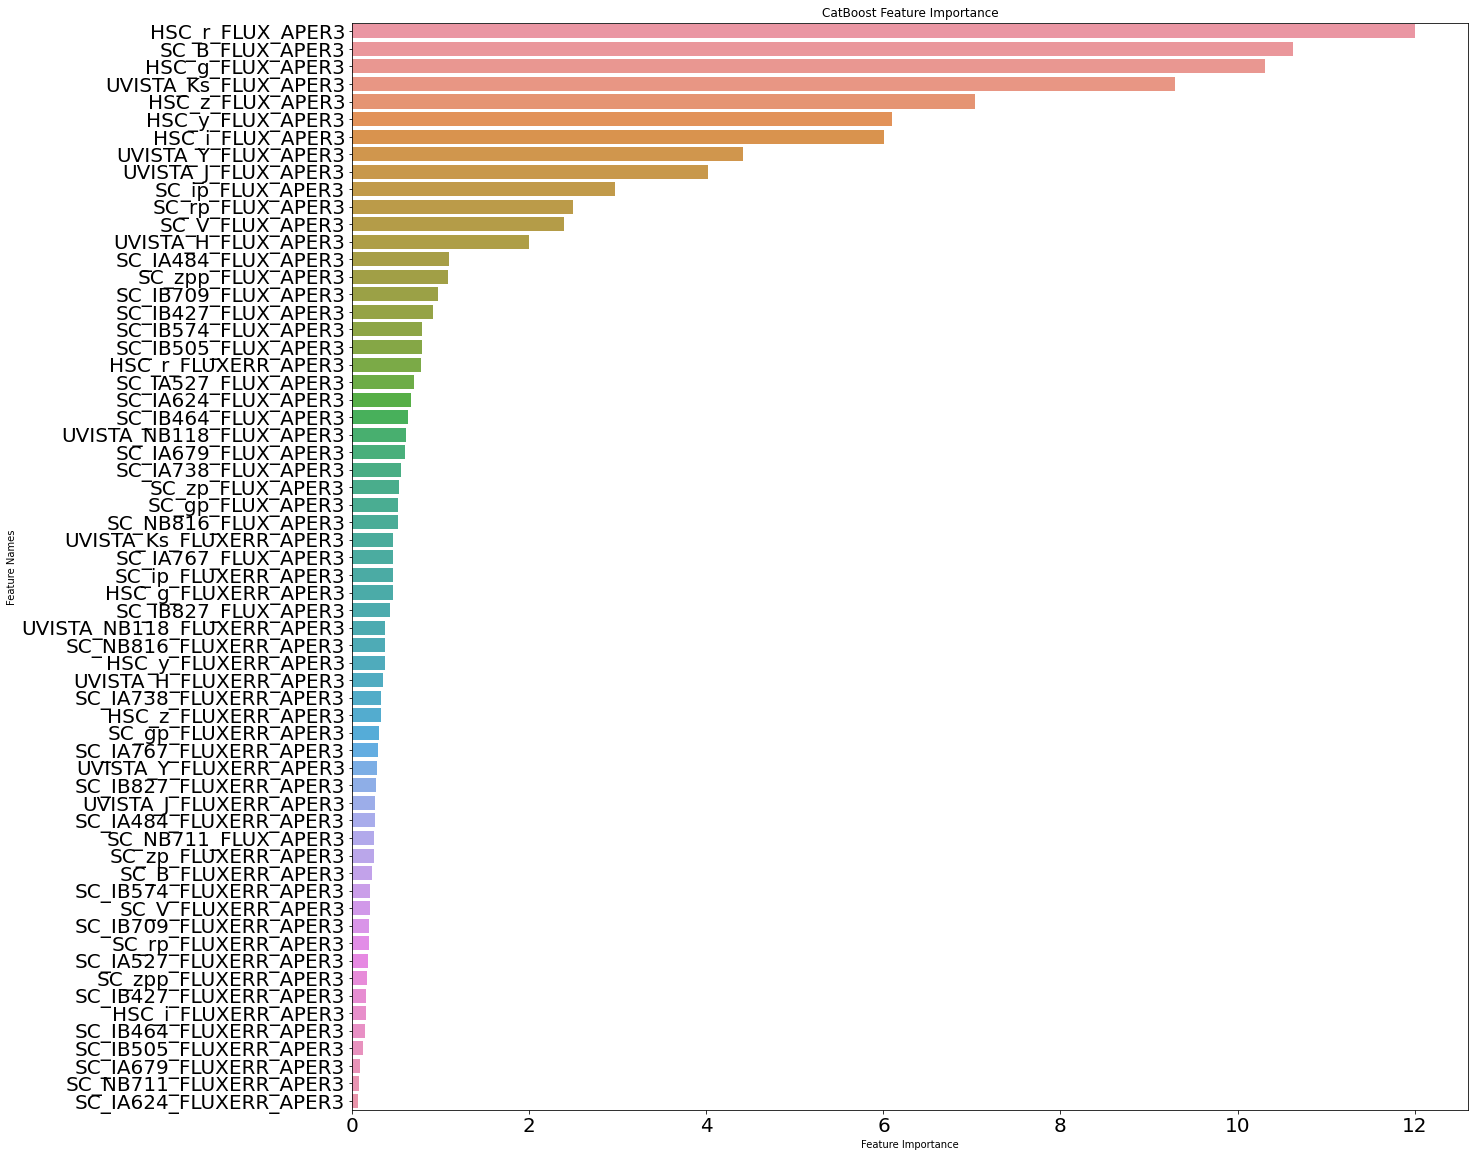

In [7]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Age:

In [8]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [9]:
y_train = y_train['lp_age'] #Ages
y_val = y_val['lp_age']
y_test = y_test['lp_age']

In [10]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.857336  1.614812  1.091089 -0.001905
0          50.0        4.0          0.802475  1.125044  0.760165  0.240248
0          50.0        7.0          0.796119  1.089777  0.736336  0.272260
0          50.0        9.0          0.793715  1.085154  0.733212  0.272896
0         100.0        0.0          0.857336  1.614812  1.091089 -0.001905
0         100.0        4.0          0.798845  1.103857  0.745849  0.257685
0         100.0        7.0          0.794377  1.080671  0.730183  0.280996
0         100.0        9.0          0.791441  1.085344  0.733340  0.276419
0         150.0        0.0          0.857336  1.614812  1.091089 -0.001905
0         150.0        4.0          0.798539  1.098642  0.742326  0.264014
0         150.0        7.0          0.791231  1.078023  0.728394  0.282098
0         150.0        9.0          0.794054  1.076065  0.727071  0.278813
Total needed time for cat

Outlier fraction: 
 0.7888598528842431

 Bias: 
 0.725673166052321

 NMAD score: 
 1.073996285757435

 R2 Test: 
 0.2830293484727867


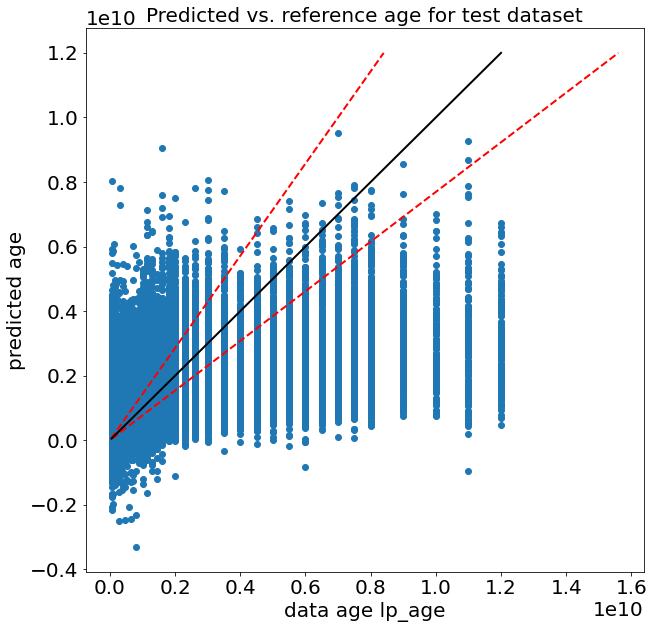

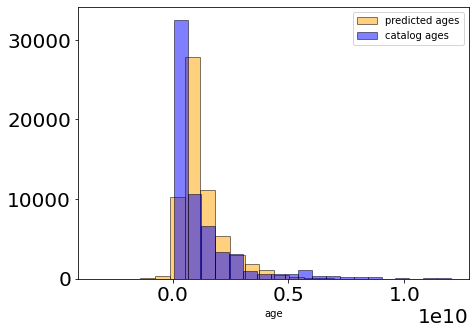

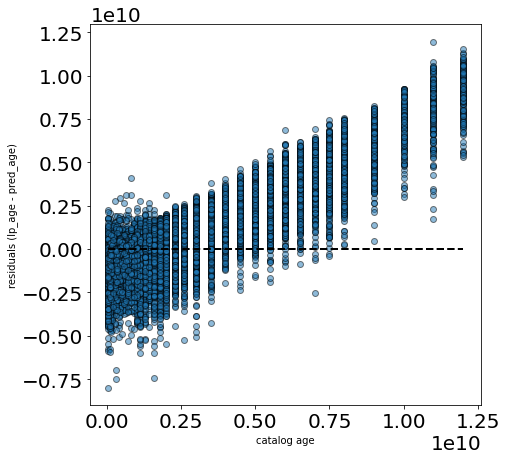

In [11]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(10,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference age for test dataset', fontsize = 20)
plt.xlabel('data age lp_age', fontsize = 20)
plt.ylabel('predicted age', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted ages')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog ages')
plt.xlabel('age')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog age')
plt.ylabel('residuals (lp_age - pred_age)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

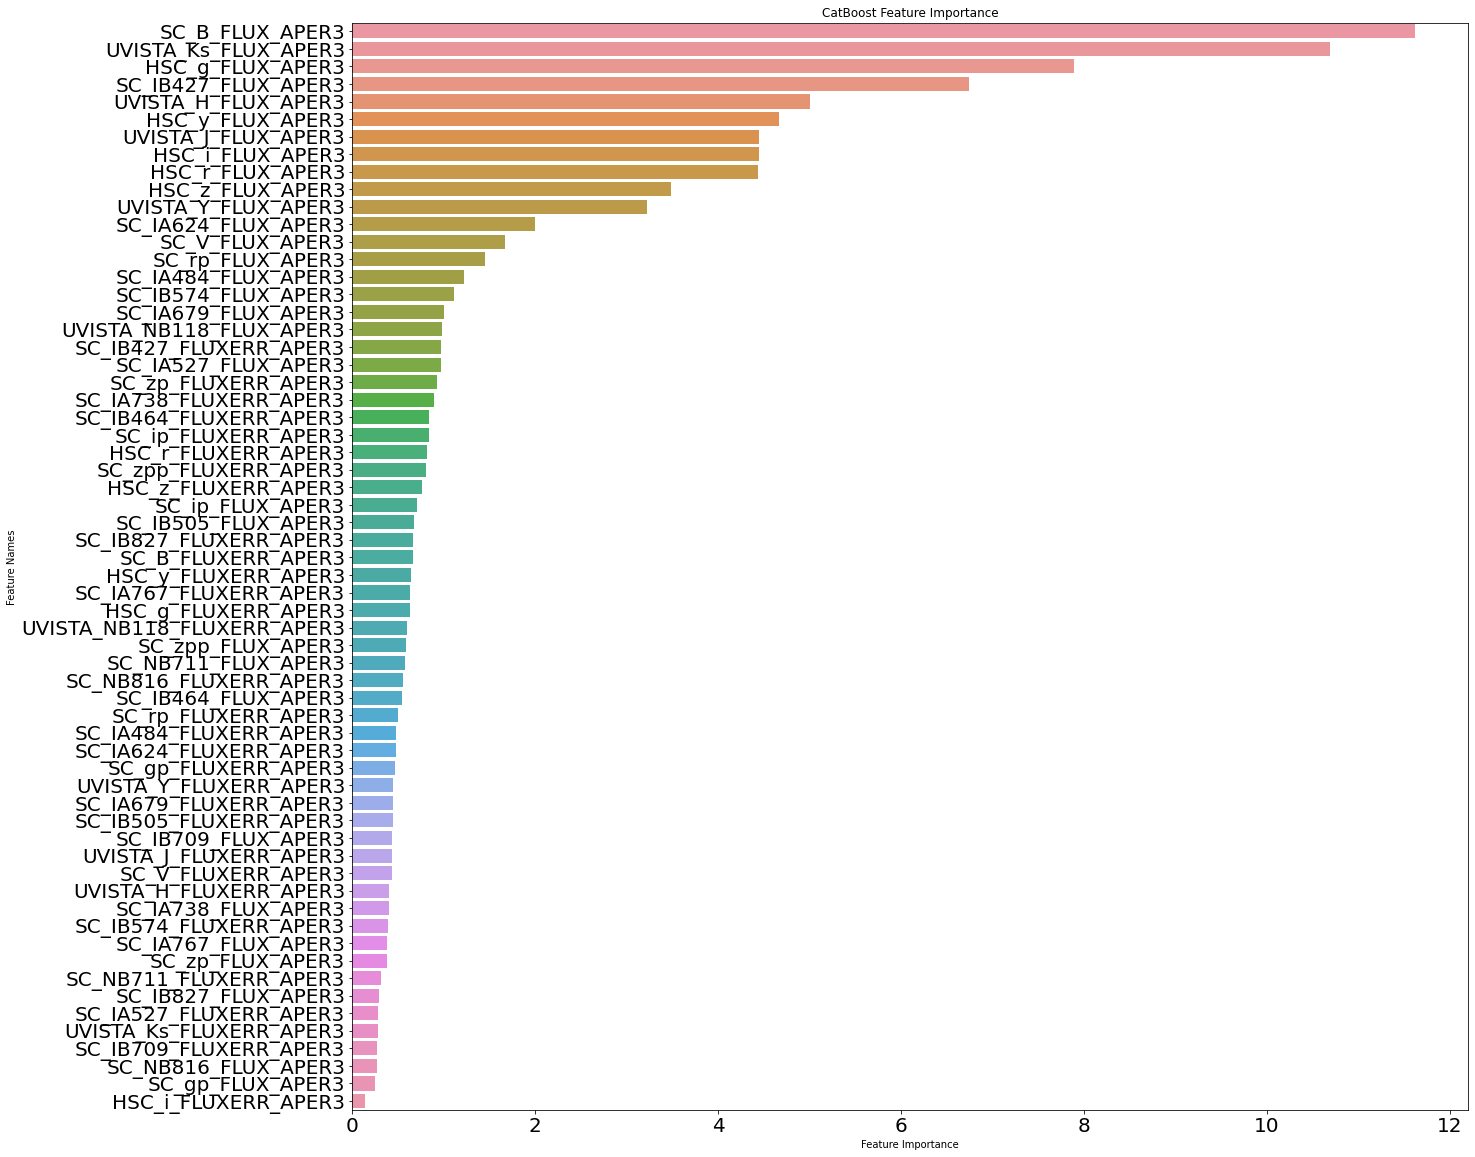

In [12]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Dust

In [13]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [14]:
y_train = y_train['lp_dust'] #Dust
y_val = y_val['lp_dust']
y_test = y_test['lp_dust']

In [15]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2


metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.009195  0.072382  0.048907 -0.000826
0          50.0        4.0          0.007388  0.098349  0.066452  0.263523
0          50.0        7.0          0.007033  0.092937  0.062795  0.298221
0          50.0        9.0          0.006759  0.090994  0.061482  0.312069
0         100.0        0.0          0.009195  0.072382  0.048907 -0.000826
0         100.0        4.0          0.007178  0.094102  0.063582  0.286604
0         100.0        7.0          0.006678  0.090100  0.060878  0.316651
0         100.0        9.0          0.006565  0.087653  0.059225  0.325680
0         150.0        0.0          0.009195  0.072382  0.048907 -0.000826
0         150.0        4.0          0.006807  0.091855  0.062064  0.302040
0         150.0        7.0          0.007065  0.088038  0.059485  0.324091
0         150.0        9.0          0.007194  0.087751  0.059291  0.324882
Total needed time for cat

Outlier fraction: 
 0.007000903342366757

 Bias: 
 0.058987064485721406

 NMAD score: 
 0.08730085543886767

 R2 Test: 
 0.3296041513069776


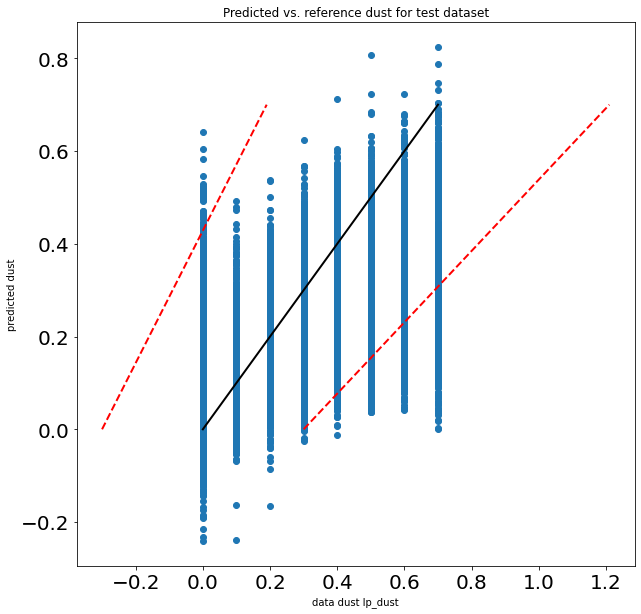

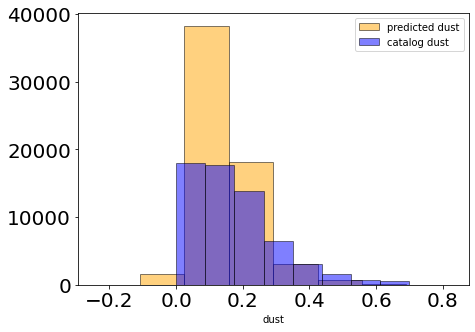

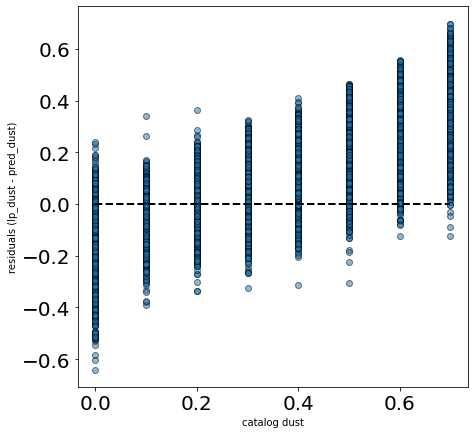

In [16]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference dust for test dataset')
plt.xlabel('data dust lp_dust')
plt.ylabel('predicted dust')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 8,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted dust')
plt.hist(y_test, 8, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog dust')
plt.xlabel('dust')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog dust')
plt.ylabel('residuals (lp_dust - pred_dust)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

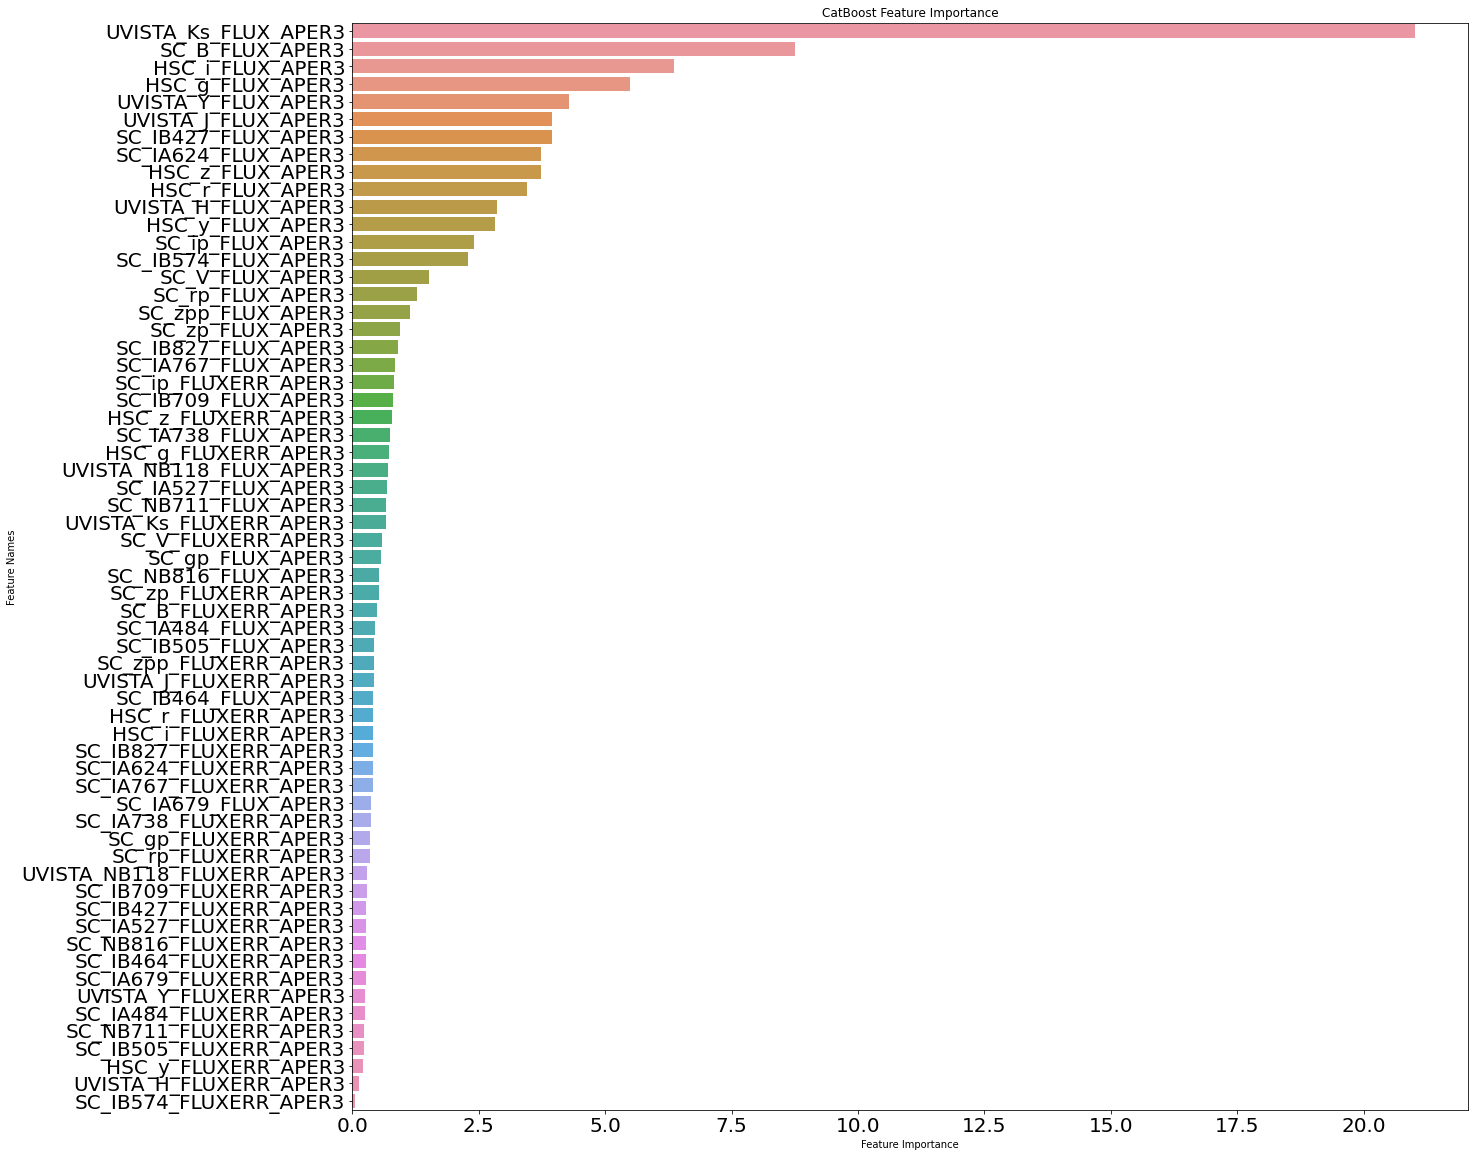

In [17]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Mass

In [18]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [19]:
y_train = y_train['lp_mass_best'] #Masses
y_val = y_val['lp_mass_best']
y_test = y_test['lp_mass_best']

In [20]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.055668  0.099765  0.067409 -0.014427
0          50.0        4.0          0.029649  0.055825  0.037720  0.522601
0          50.0        7.0          0.028730  0.053273  0.035995  0.537075
0          50.0        9.0          0.028246  0.051941  0.035095  0.541132
0         100.0        0.0          0.055668  0.099765  0.067409 -0.014427
0         100.0        4.0          0.028891  0.053919  0.036432  0.533725
0         100.0        7.0          0.028100  0.051348  0.034695  0.544747
0         100.0        9.0          0.027584  0.050702  0.034258  0.544282
0         150.0        0.0          0.055668  0.099765  0.067409 -0.014427
0         150.0        4.0          0.028342  0.052798  0.035674  0.539603
0         150.0        7.0          0.027697  0.050392  0.034049  0.547393
0         150.0        9.0          0.027842  0.050636  0.034213  0.544148
Total needed time for cat

Outlier fraction: 
 0.028164924506387922

 Bias: 
 0.03418460536867583

 NMAD score: 
 0.05059321594564023

 R2 Test: 
 0.5393151769391772


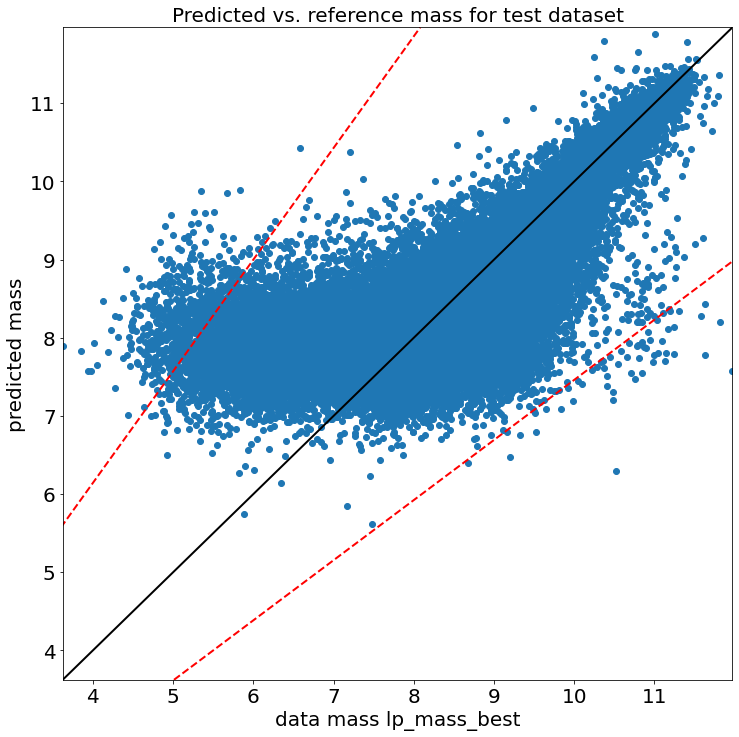

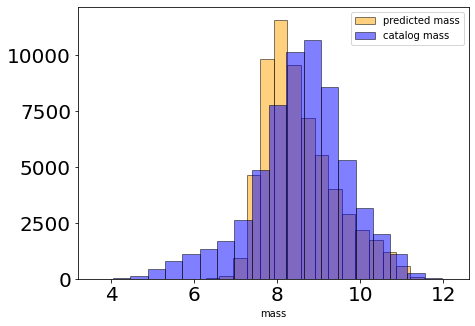

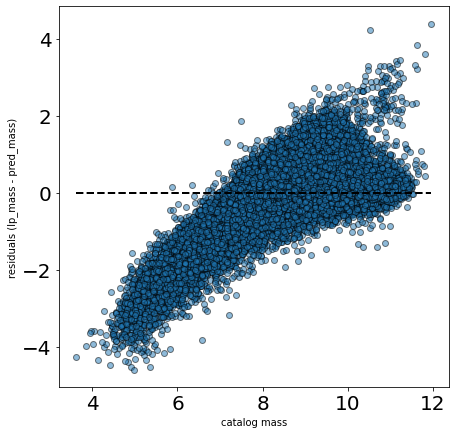

In [21]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference mass for test dataset', fontsize = 20)
plt.xlabel('data mass lp_mass_best', fontsize = 20)
plt.ylabel('predicted mass', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.xlim(np.min(y_test), np.max(y_test))
plt.ylim(np.min(y_test), np.max(y_test))
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted mass')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog mass')
plt.xlabel('mass')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog mass')
plt.ylabel('residuals (lp_mass - pred_mass)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

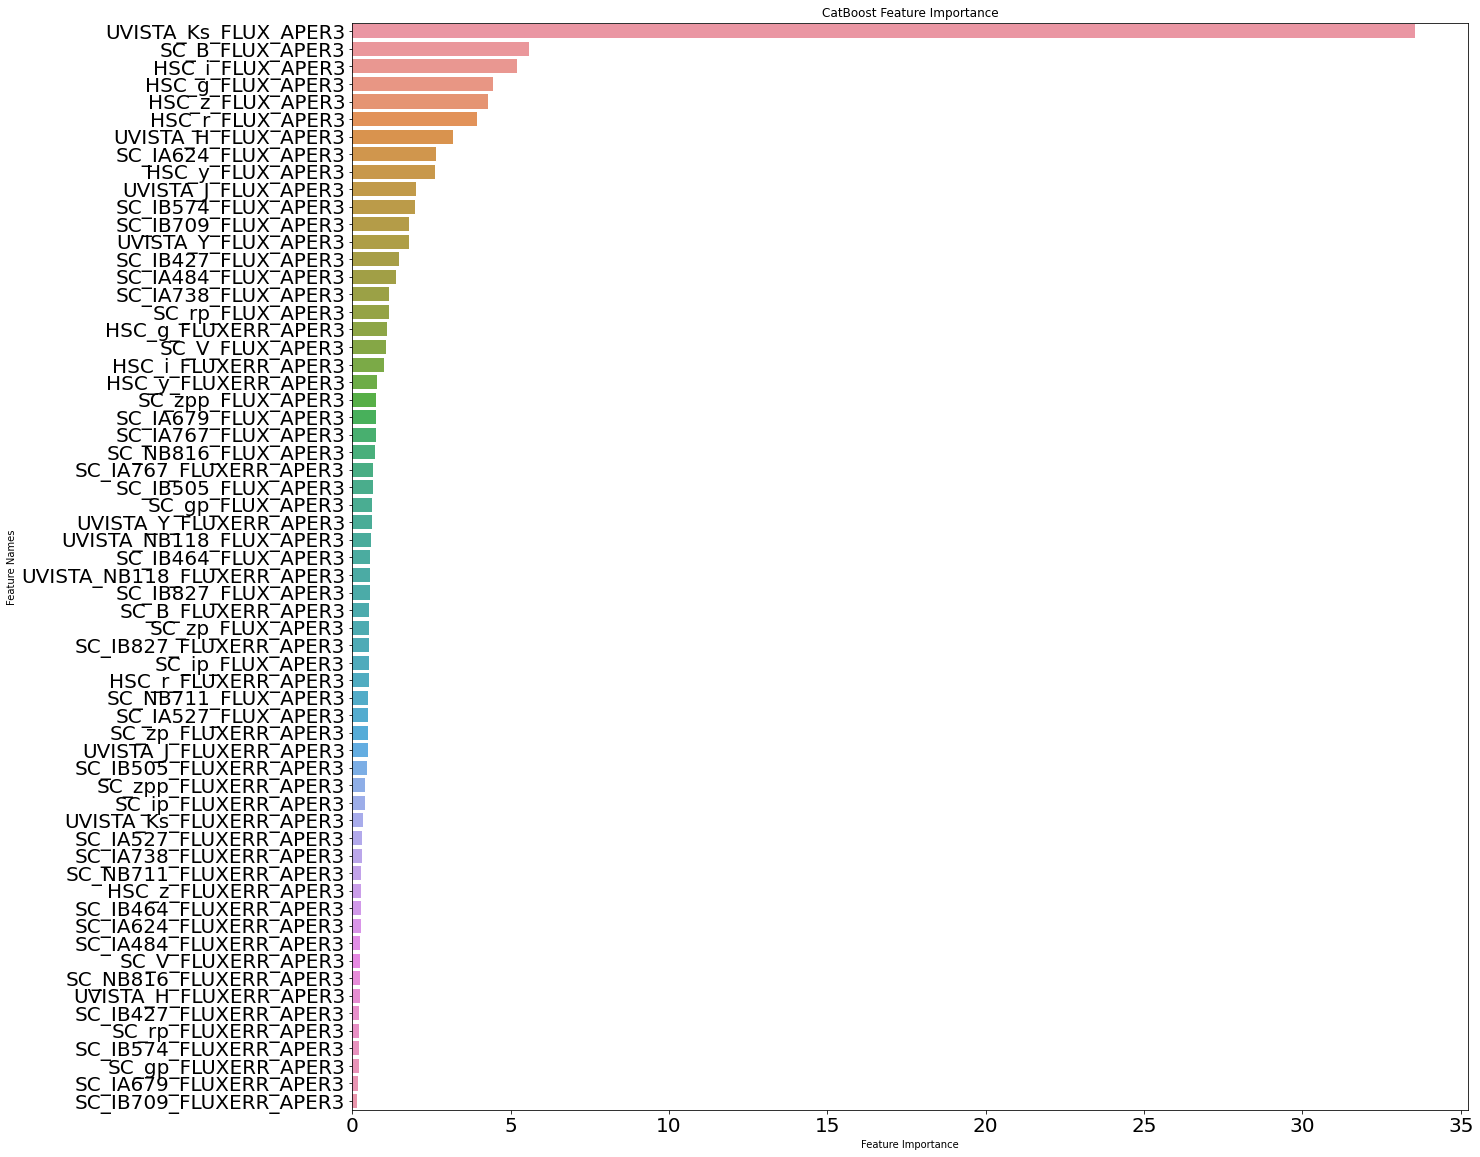

In [22]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# SFR

In [23]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [24]:
y_train = y_train['lp_SFR_best'] #SFR
y_val = y_val['lp_SFR_best']
y_test = y_test['lp_SFR_best']

In [25]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    #y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    #outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return nmad, bias, r2


metrics = {'n_estimators': [], 'max_depth': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth      NMAD      bias        r2
0          50.0        0.0  0.695331  0.469818 -0.000026
0          50.0        4.0  0.401366  0.271193  0.215607
0          50.0        7.0  0.376871  0.254643  0.234734
0          50.0        9.0  0.373549  0.252398  0.233553
0         100.0        0.0  0.695331  0.469818 -0.000026
0         100.0        4.0  0.385554  0.260510  0.230911
0         100.0        7.0  0.363786  0.245802  0.238139
0         100.0        9.0  0.354811  0.239737  0.240368
0         150.0        0.0  0.695331  0.469818 -0.000026
0         150.0        4.0  0.380565  0.257138  0.237191
0         150.0        7.0  0.356857  0.241120  0.243429
0         150.0        9.0  0.346792  0.234319  0.240883
Total needed time for catboost: 1.5975035031636555 minutes



 Bias: 
 0.2318646456358951

 NMAD score: 
 0.34315967554112475

 R2 Test: 
 0.26892411541734307


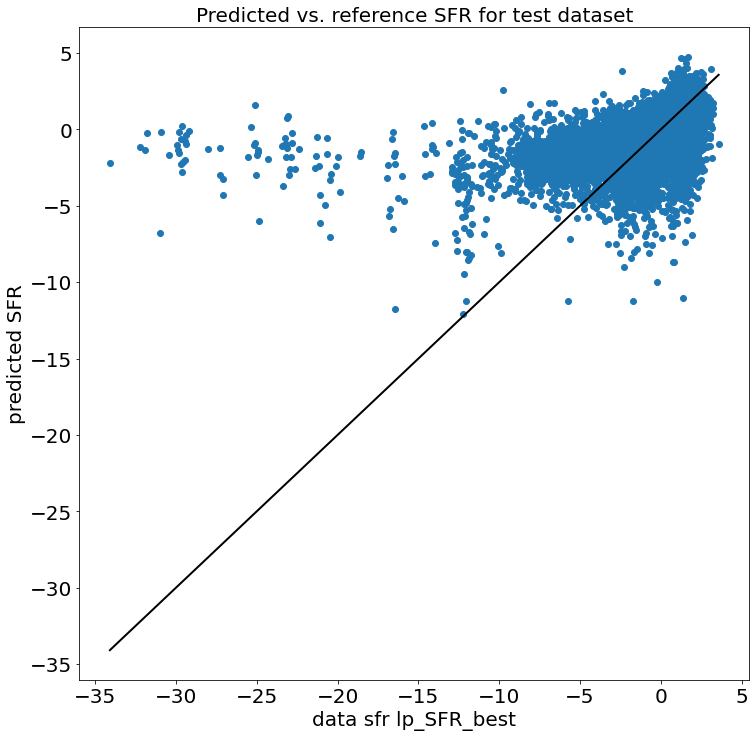

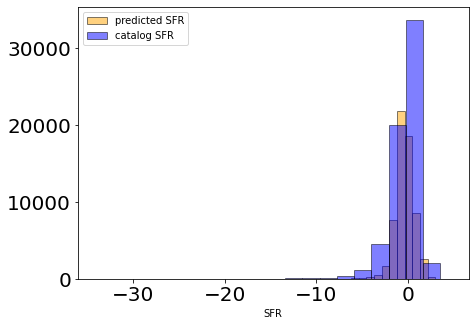

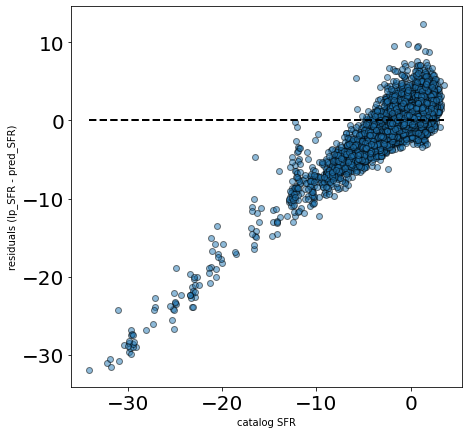

In [26]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference SFR for test dataset', fontsize = 20)
plt.xlabel('data sfr lp_SFR_best', fontsize = 20)
plt.ylabel('predicted SFR', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
#plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
#plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted SFR')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog SFR')
plt.xlabel('SFR')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog SFR')
plt.ylabel('residuals (lp_SFR - pred_SFR)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

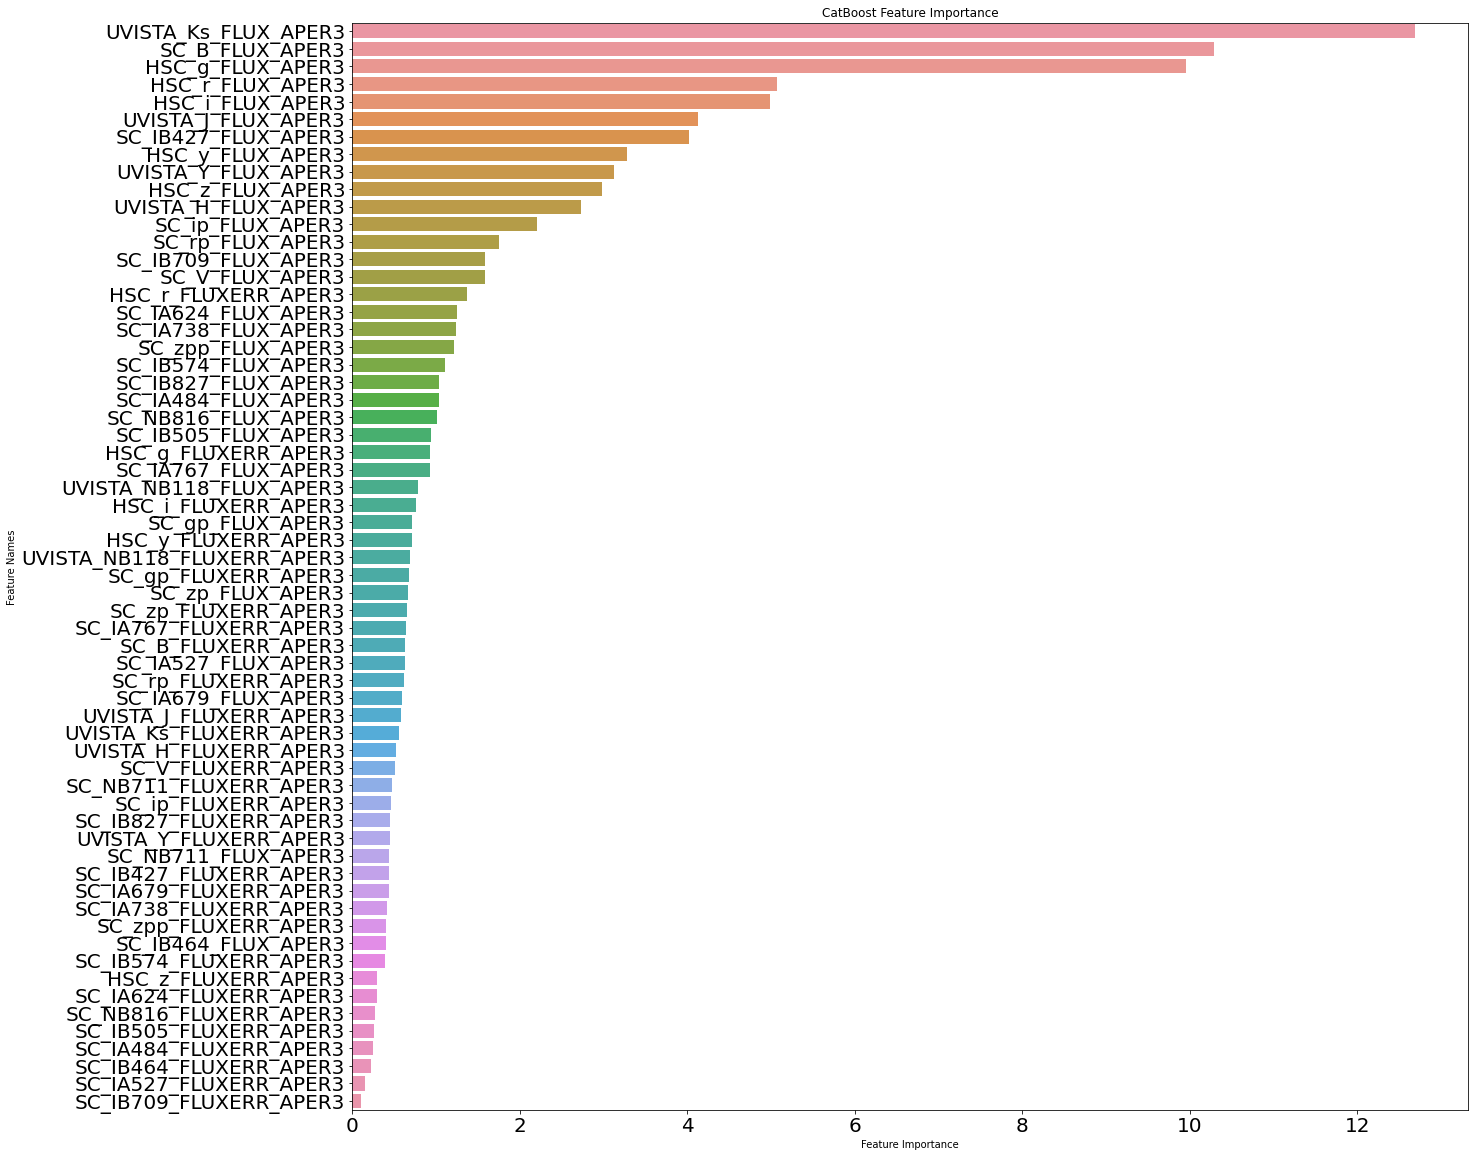

In [27]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)